## Multiclass_classification: one vs rest, one vs one

### ONE VS ALL
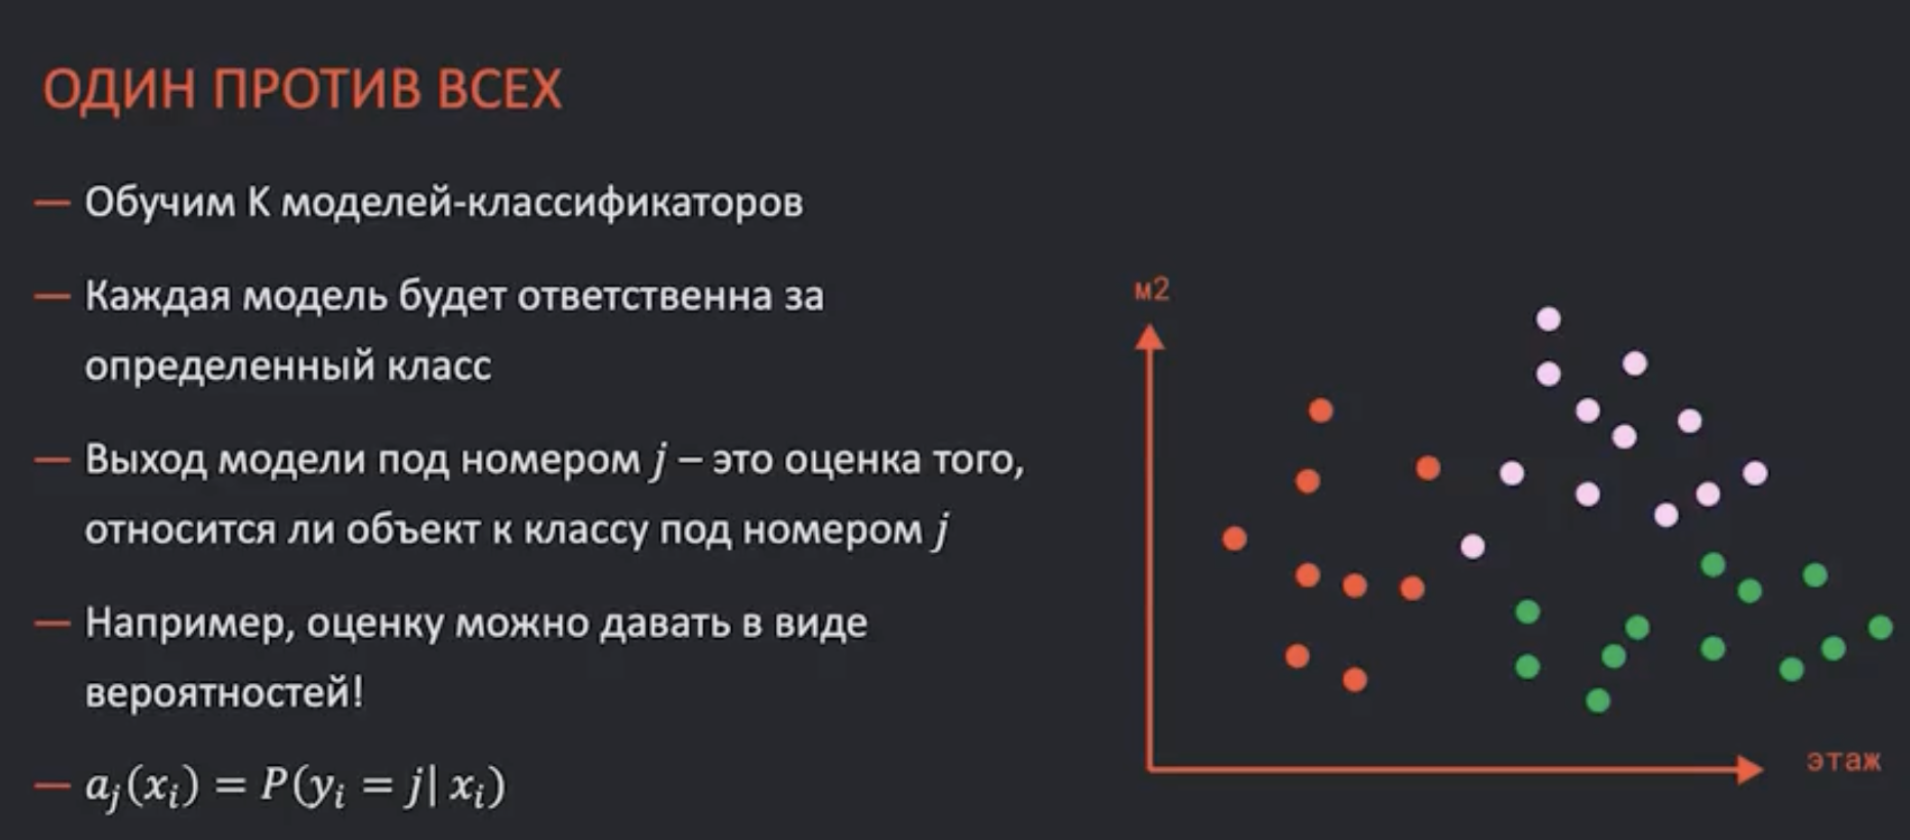
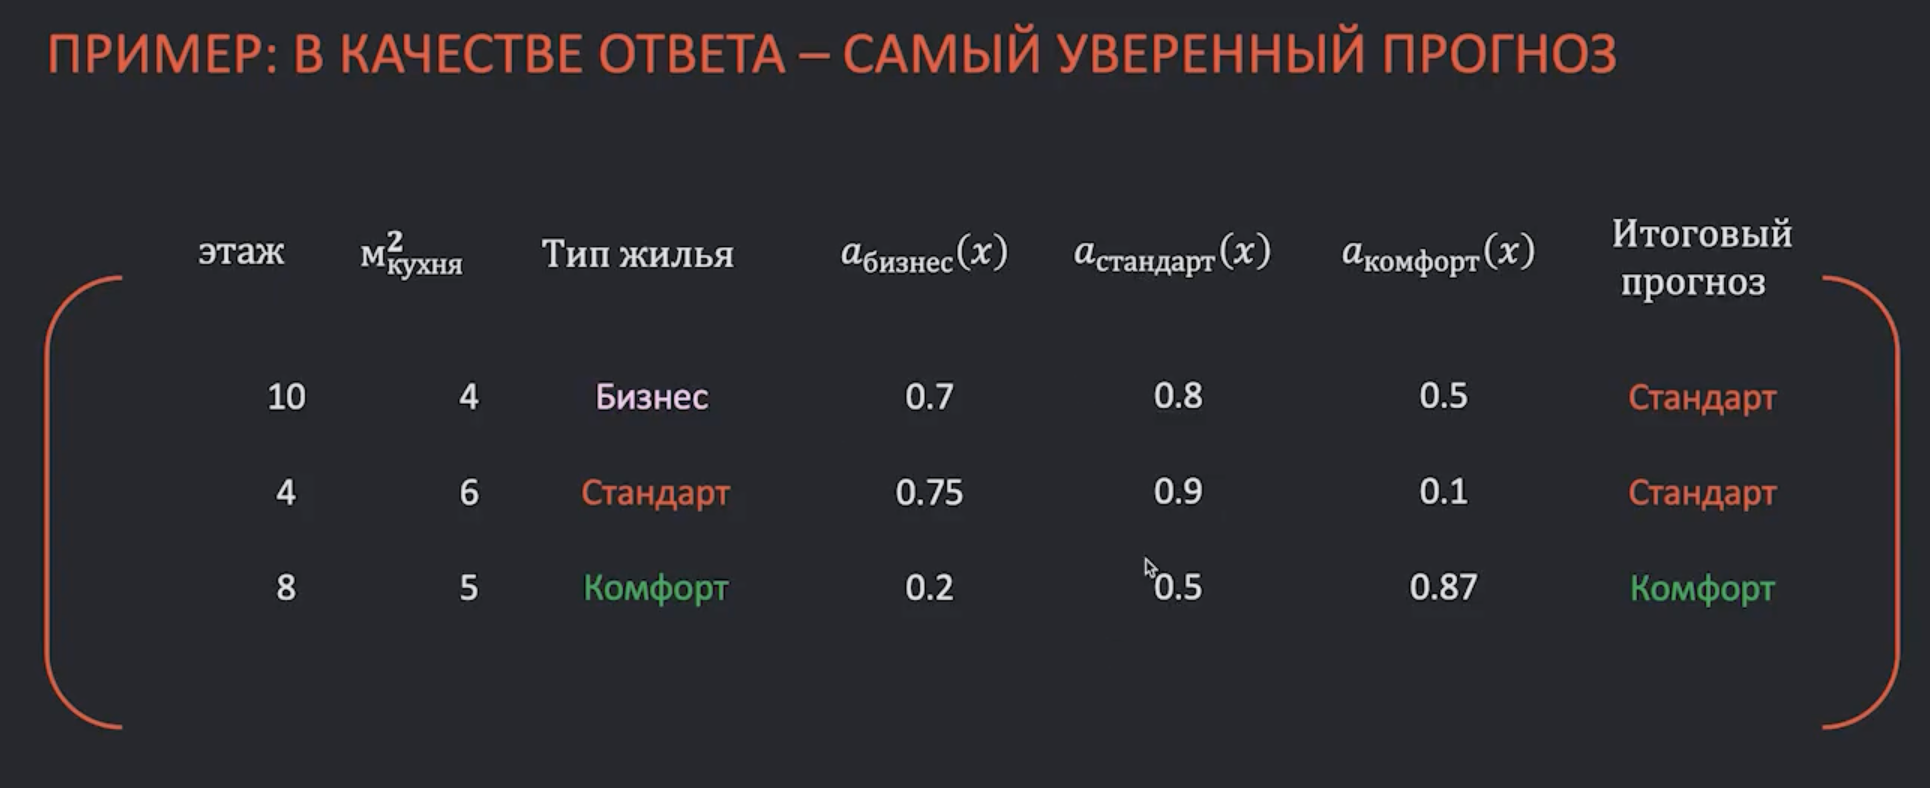

### ALL VS ALL
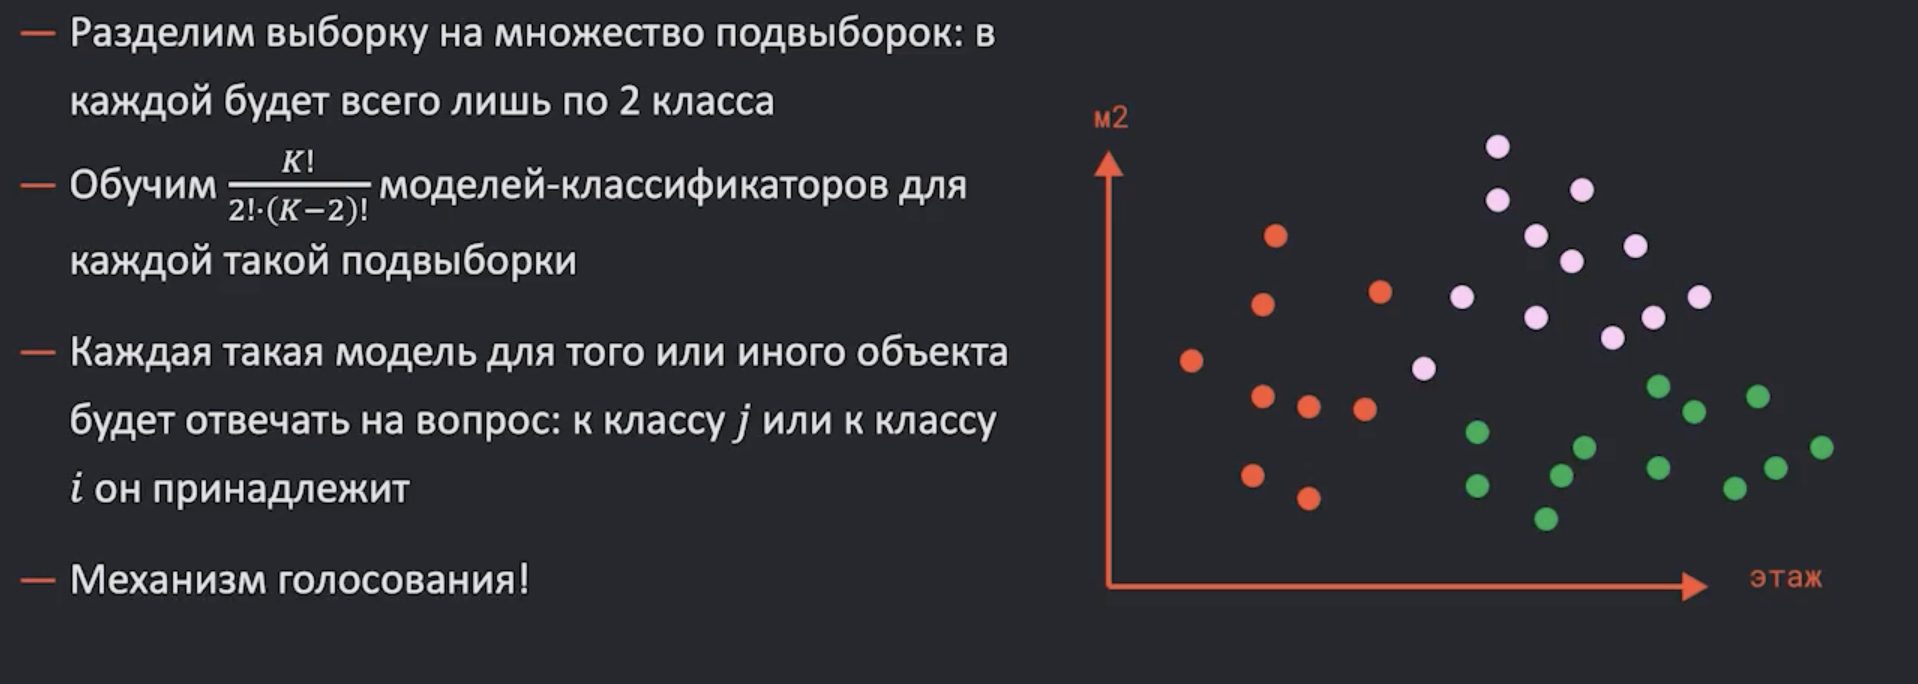
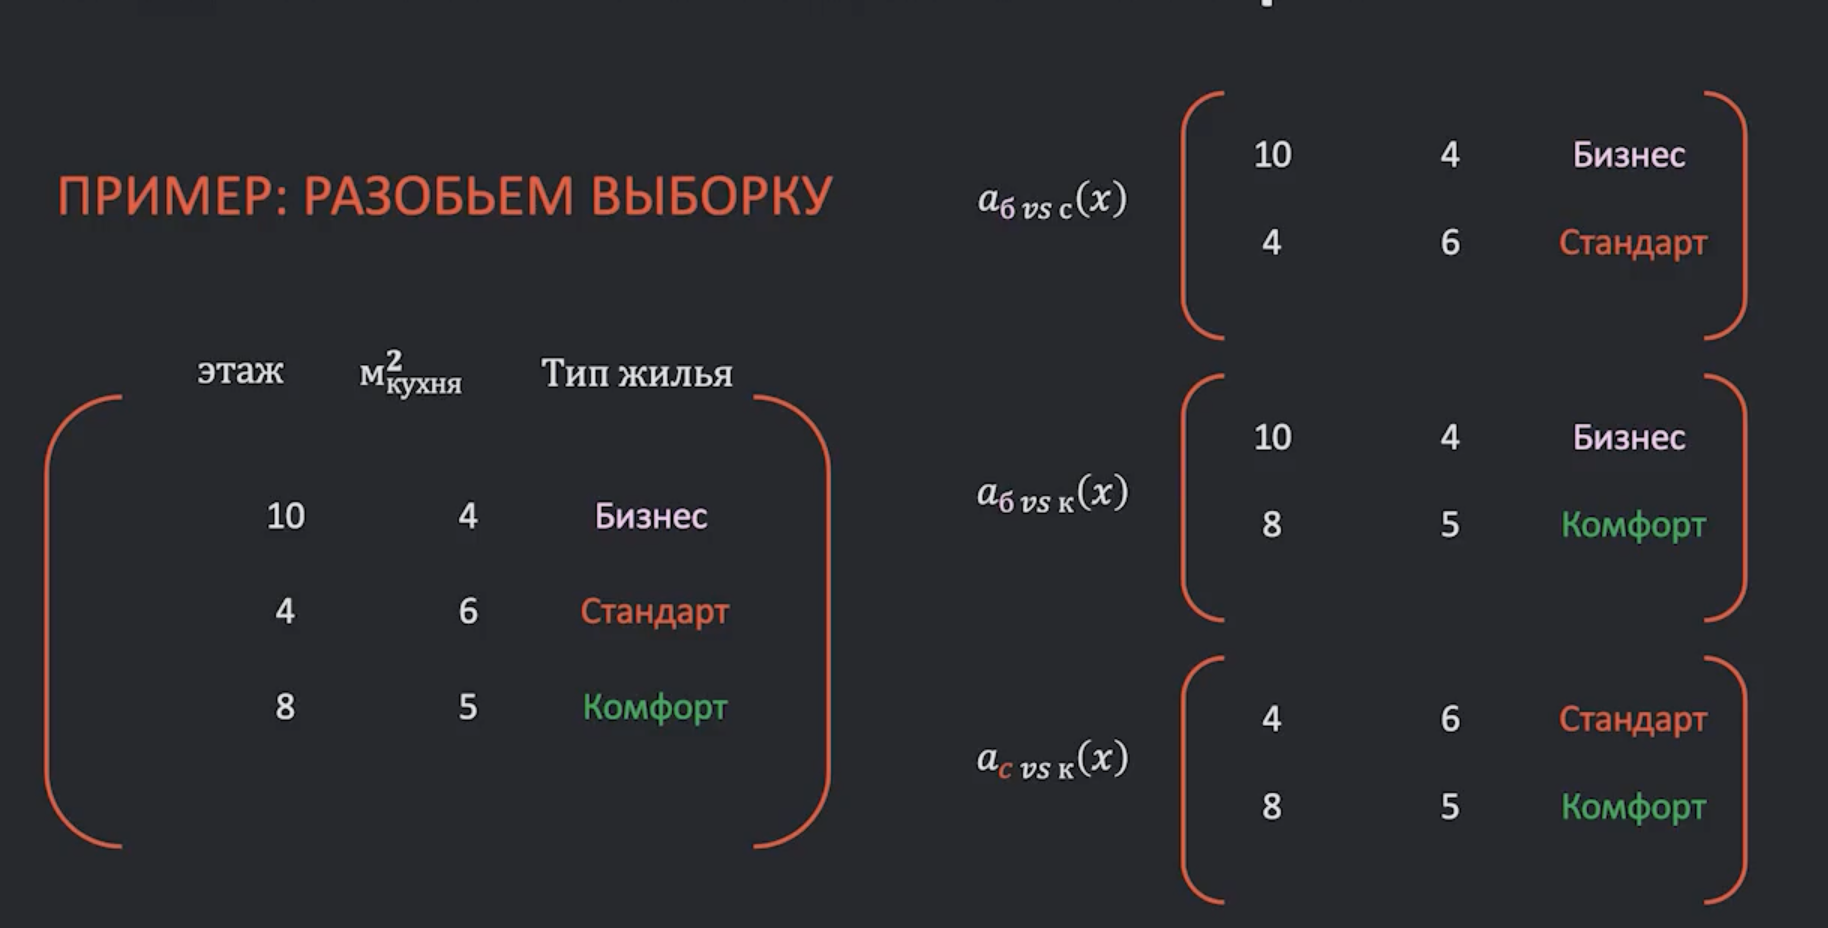
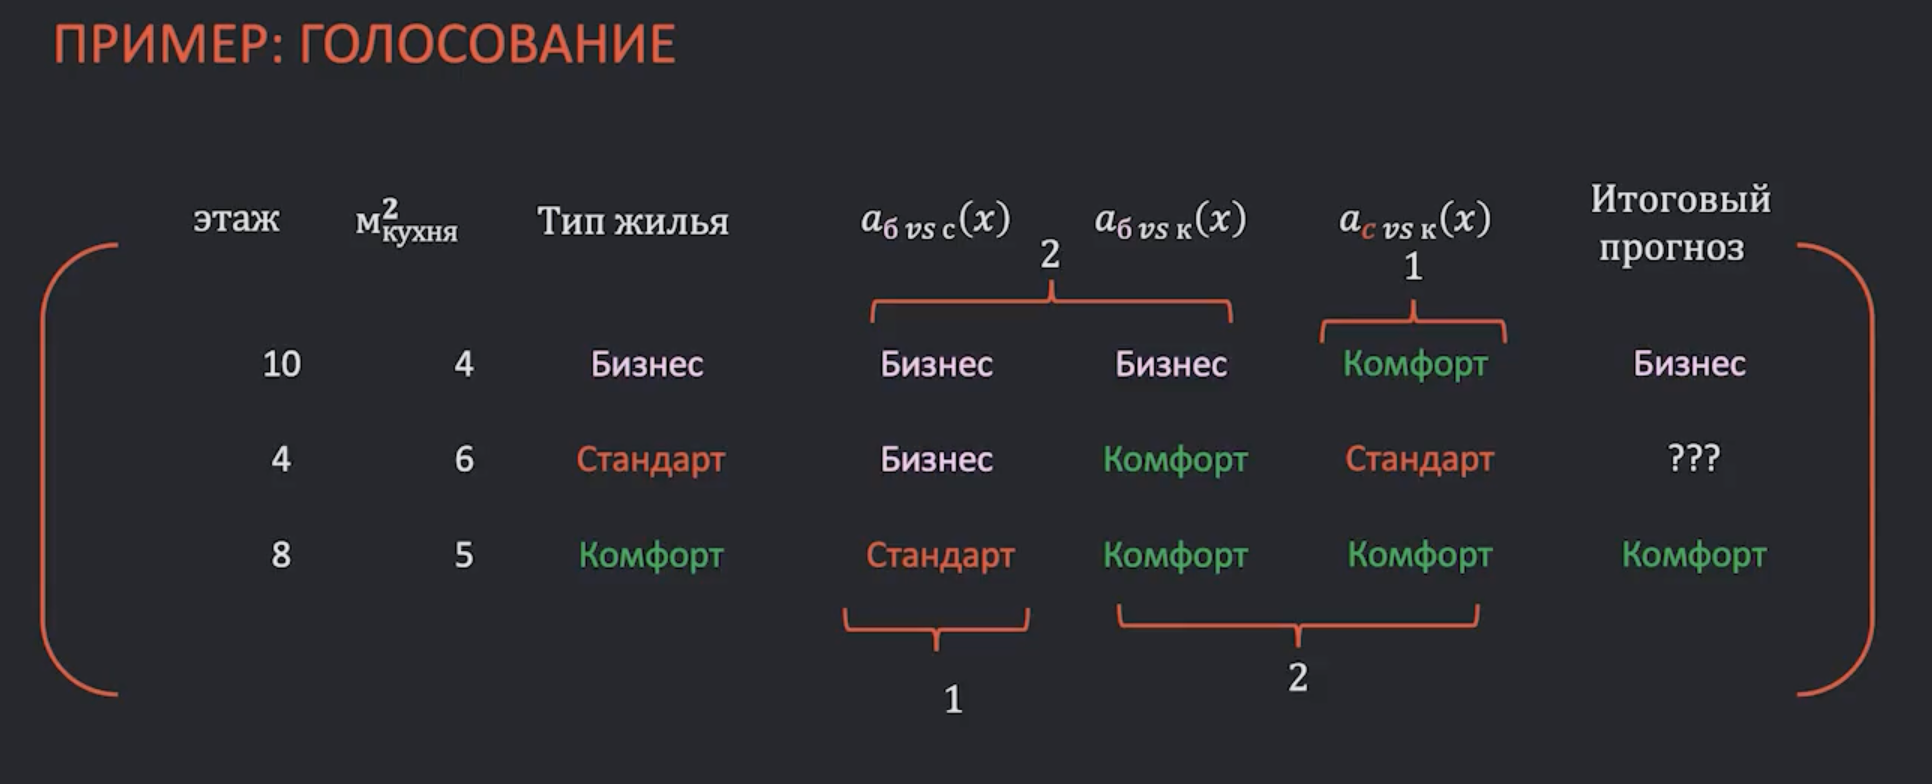

### Метрики

#### Микроусреднение
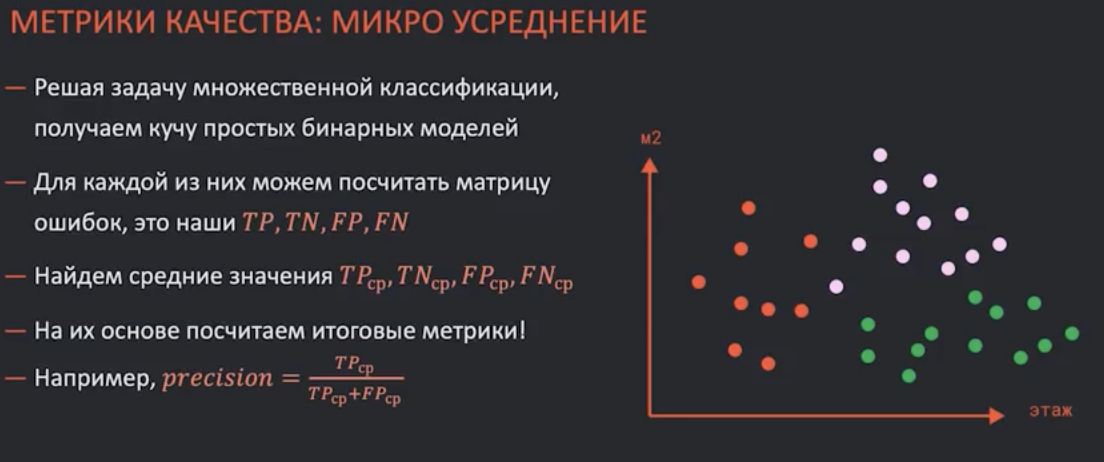

#### Макроусреднение
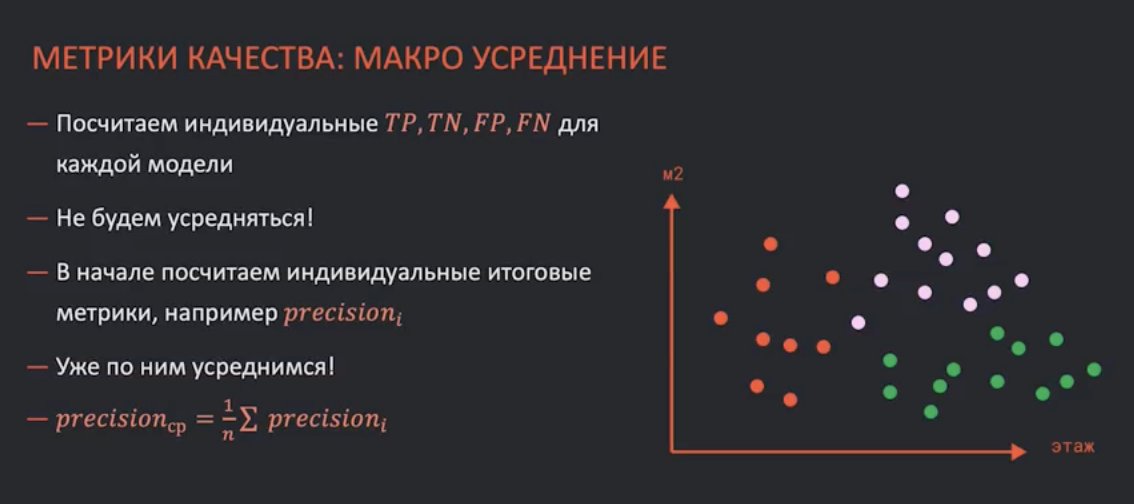

In [1]:
#`SGDClassifier` — это обобщённый линейный классификатор, который может обучаться под разные функции потерь:

#loss='hinge' — линейный SVM  
#loss='log_loss' — логистическая регрессия  
#loss='modified_huber' — гладкая и устойчивая к выбросам функция  

from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(
    loss='hinge',        # или 'log_loss', 'modified_huber', и т.д.
    penalty='l2',        # регуляризация: 'l1', 'l2' или 'elasticnet'
    alpha=0.0001,        # коэффициент регуляризации
    max_iter=1000,       # макс. число итераций
    tol=1e-3,            # критерий остановки
    random_state=42
)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier ### Один против всех

pipe = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_all", OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss')))])

pipe.fit(X_train, y_train)

print(pipe.classes_)
print(pipe.predict(X_test.head(1)))
print(pipe.decision_function(X_test.head(1)))
print(pipe.predict_proba(X_test.head(1)))

In [ ]:
### Замерим accuracy

np.mean((pipe.predict(X_test) == Y_test))

In [ ]:
from sklearn.multiclass import OneVsOneClassifier #### all vs all


pipe = Pipeline([("scaler", StandardScaler()),
                         ("all_vs_all", OneVsOneClassifier(SGDClassifier()))])

pipe.fit(X_train, Y_train)

print(pipe.classes_)
print(pipe.predict(X_test.head(1)))

In [ ]:
### Макро и микро метрики

from sklearn.metrics import precision_score, recall_score, f1_score


print(f"""Precision равно: {precision_score(Y_test, 
                                            pipe_all_all.predict(X_test), 
                                            average='macro'):.3f}""" )

print(f"""Recall равно: {recall_score(Y_test,
                                      pipe_all_all.predict(X_test),
                                      average='macro'):.3f}""" )

print(f"""F-мера равно: {f1_score(Y_test, 
                                  pipe_all_all.predict(X_test),
                                  average='macro'):.3f}""" )




print(f"""Precision равно: {precision_score(Y_test, 
                                            pipe_all_all.predict(X_test), 
                                            average='micro'):.3f}""" )

print(f"""Recall равно: {recall_score(Y_test,
                                      pipe_all_all.predict(X_test),
                                      average='micro'):.3f}""" )

print(f"""F-мера равно: {f1_score(Y_test, 
                                  pipe_all_all.predict(X_test),
                                  average='micro'):.3f}""" )